Epoch 1/1000
46/46 [==============================] - 1s 9ms/step - loss: 180908.2969
Epoch 2/1000
46/46 [==============================] - 0s 6ms/step - loss: 180811.6094
Epoch 3/1000
46/46 [==============================] - 0s 6ms/step - loss: 180434.6562
Epoch 4/1000
46/46 [==============================] - 0s 6ms/step - loss: 179455.3906
Epoch 5/1000
46/46 [==============================] - 0s 6ms/step - loss: 177555.7656
Epoch 6/1000
46/46 [==============================] - 0s 6ms/step - loss: 174267.3594
Epoch 7/1000
46/46 [==============================] - 0s 6ms/step - loss: 169378.2188
Epoch 8/1000
46/46 [==============================] - 0s 6ms/step - loss: 162547.6094
Epoch 9/1000
46/46 [==============================] - 0s 6ms/step - loss: 154032.4375
Epoch 10/1000
46/46 [==============================] - 0s 6ms/step - loss: 143992.7344
Epoch 11/1000
46/46 [==============================] - 0s 6ms/step - loss: 133814.9375
Epoch 12/1000
46/46 [==============================]

<Axes: >

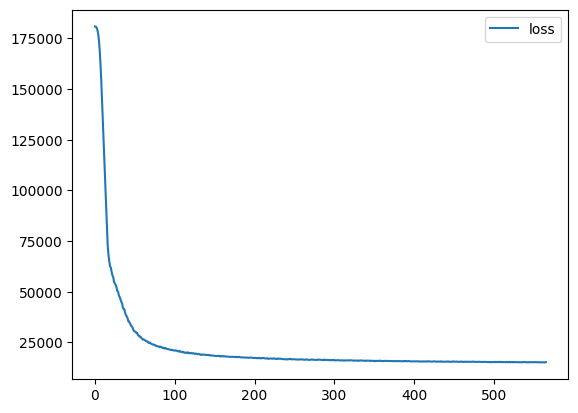

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.impute import SimpleImputer

houses_train = pd.read_csv('train.csv')
houses_test = pd.read_csv('test.csv')
numeric_features_names = ['KitchenAbvGr', 'GarageCars', 'FullBath', 'GarageArea', '1stFlrSF', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'Fireplaces', 'TotRmsAbvGrd', 'YearBuilt', 'BedroomAbvGr', 'HalfBath', 'LotArea', 'MSSubClass', 'YearRemodAdd', 'MoSold', 'BsmtFullBath', 'YrSold']
numeric_features = houses_train[numeric_features_names]
sale_price = houses_train['SalePrice']
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(numeric_features)
X_train_imp = imp.transform(numeric_features)
X = tf.convert_to_tensor(X_train_imp)
Y = tf.convert_to_tensor(houses_train['SalePrice'])

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X)

model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1)
])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30, restore_best_weights=True)
model.compile(
    loss='mean_absolute_error', 
    optimizer=tf.keras.optimizers.legacy.Adam(0.001),
)
hist = model.fit(X, Y, epochs=1000, verbose=1, callbacks=[callback])
history_df = pd.DataFrame(hist.history)
history_df.loc[:, ['loss']].plot()

46/46 [==============================] - 0s 3ms/step


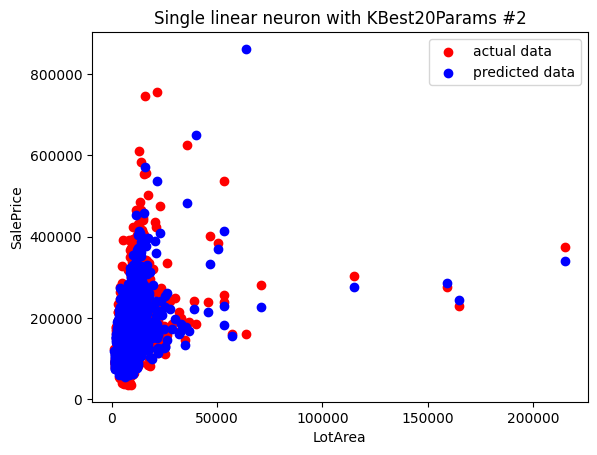

In [8]:

import matplotlib.pyplot as plt
Y_predict = model.predict(X)
plt.scatter(numeric_features.LotArea, sale_price, color='red', label='actual data')
plt.scatter(numeric_features.LotArea, Y_predict, color='blue', label='predicted data')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Single linear neuron with KBest20Params #2')
plt.legend()


In [10]:
X_test = tf.convert_to_tensor(houses_test[numeric_features_names])
Y_test = model.predict(X_test)
arr = np.concatenate((np.array(houses_test['Id']).reshape(-1, 1), Y_test), axis=1)
np.savetxt("submission7.csv", arr, fmt='%d,%1.5f', header='Id,SalePrice', comments='')

46/46 [==============================] - 0s 2ms/step
